In [1]:
# !pip install ipycanvas
# !jupyter nbextension enable --py widgetsnbextension


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Load and preprocess the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input images to [0, 1] and flatten to 784-dim vector
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0


# Convert labels to one-hot encoding (optional for sparse_categorical_crossentropy)
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


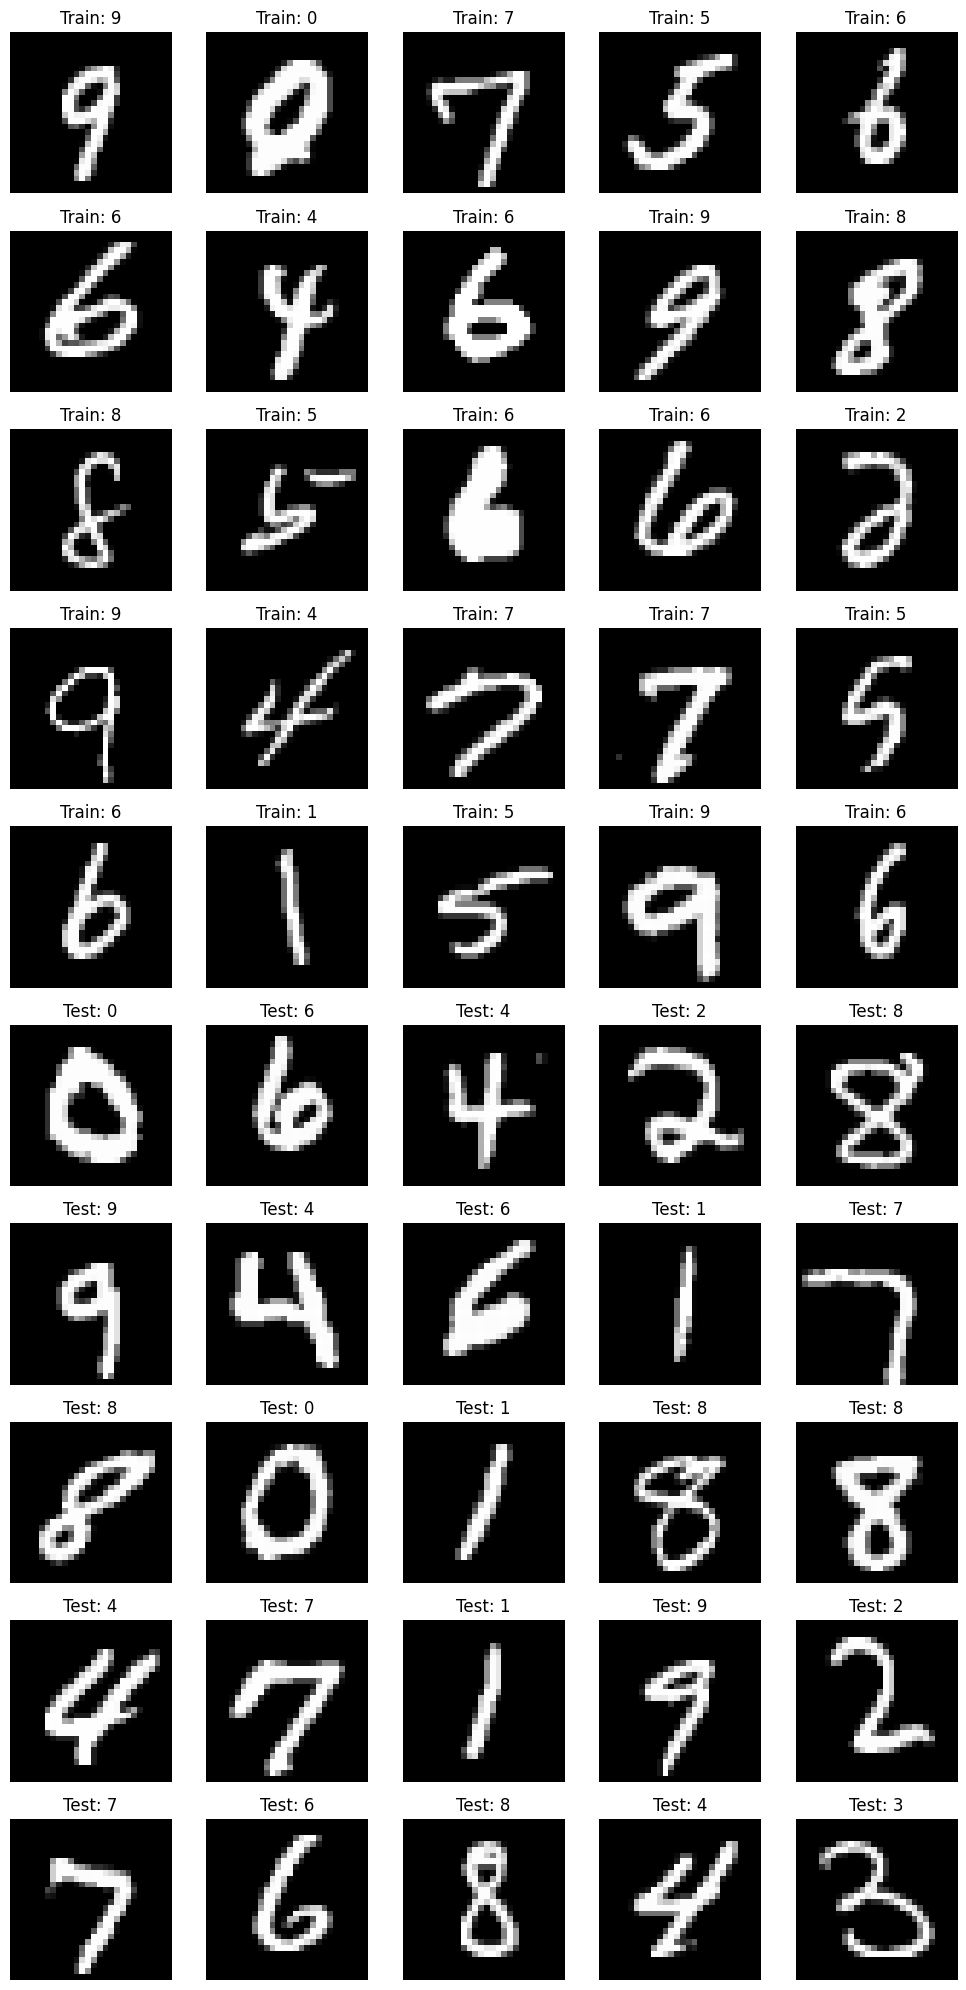

In [4]:
# Randomly select 25 training and 25 test images
num_samples = 25
train_indices = np.random.choice(x_train.shape[0], num_samples, replace=False)
test_indices = np.random.choice(x_test.shape[0], num_samples, replace=False)

train_images = x_train[train_indices].reshape(-1, 28, 28)
train_labels = y_train[train_indices]

test_images = x_test[test_indices].reshape(-1, 28, 28)
test_labels = y_test[test_indices]

# Plotting 10x10 grid: 5x5 training (top), 5x5 test (bottom)
fig, axs = plt.subplots(10, 5, figsize=(10, 20))

for i in range(5):
    for j in range(5):
        idx = i * 5 + j
        axs[i, j].imshow(train_images[idx], cmap='gray')
        axs[i, j].set_title(f"Train: {train_labels[idx]}")
        axs[i, j].axis('off')

        axs[i + 5, j].imshow(test_images[idx], cmap='gray')
        axs[i + 5, j].set_title(f"Test: {test_labels[idx]}")
        axs[i + 5, j].axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Build MLP model
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # No activation since we'll use sparse_categorical_crossentropy
])



In [6]:
# Compile the model
model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)



In [7]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)



Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5942 - loss: 1.4721 - val_accuracy: 0.9043 - val_loss: 0.3738
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8870 - loss: 0.4132 - val_accuracy: 0.9255 - val_loss: 0.2744
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.3316 - val_accuracy: 0.9317 - val_loss: 0.2409
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9171 - loss: 0.2891 - val_accuracy: 0.9380 - val_loss: 0.2185
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9239 - loss: 0.2668 - val_accuracy: 0.9428 - val_loss: 0.2017
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9307 - loss: 0.2426 - val_accuracy: 0.9482 - val_loss: 0.1894
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9336 - loss: 0.2278 - val_accuracy: 0.9503 - val_loss: 0.1775
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9383 - loss: 0.2159 - val_accuracy: 0.

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc * 100:.2f}%")


Test accuracy: 94.67%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


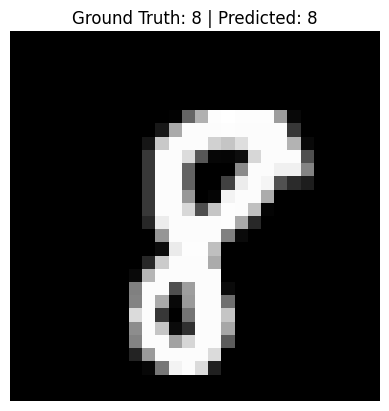

In [10]:
import random

# Pick a random test sample
index = random.randint(0, x_test.shape[0] - 1)
sample_image = x_test[index].reshape(1, 784)  # Flatten for model input
ground_truth = y_test[index]

# Predict the label
logits = model.predict(sample_image)
predicted_label = np.argmax(logits)

# Reshape back to 28x28 for visualization
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Ground Truth: {ground_truth} | Predicted: {predicted_label}")
plt.axis('off')
plt.show()
